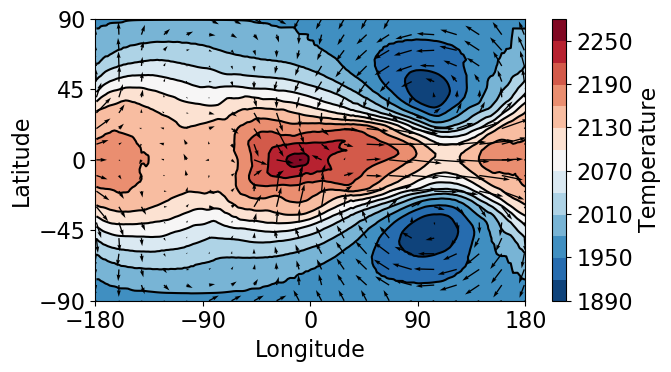

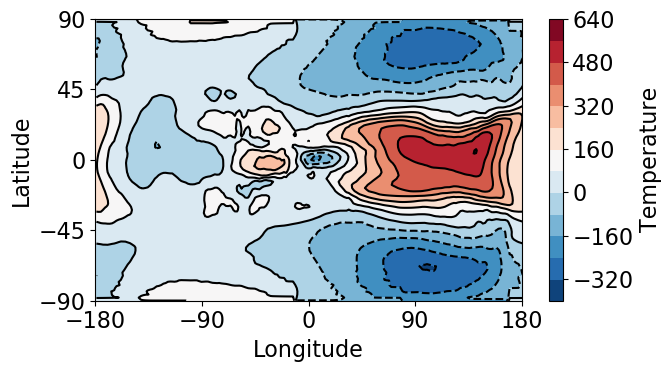

<Figure size 640x480 with 0 Axes>

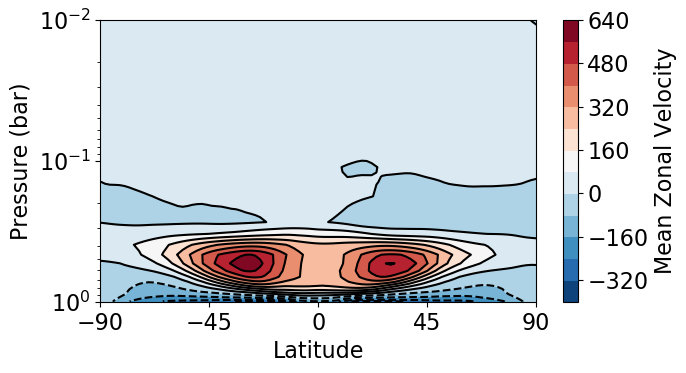

<Figure size 640x480 with 0 Axes>

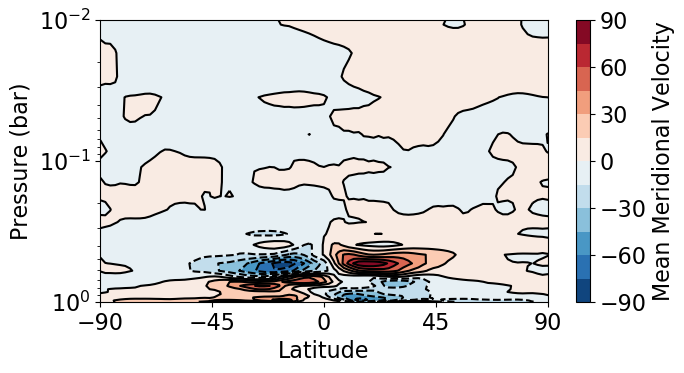

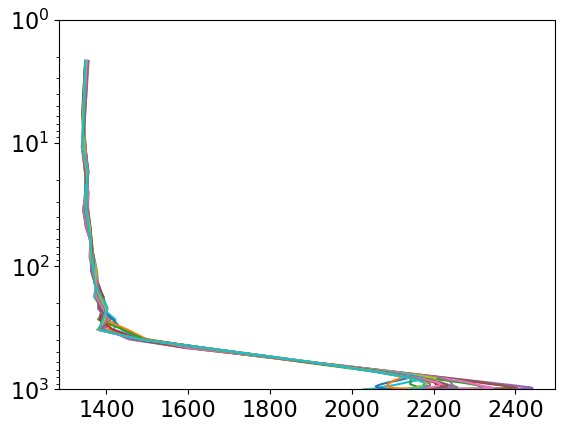

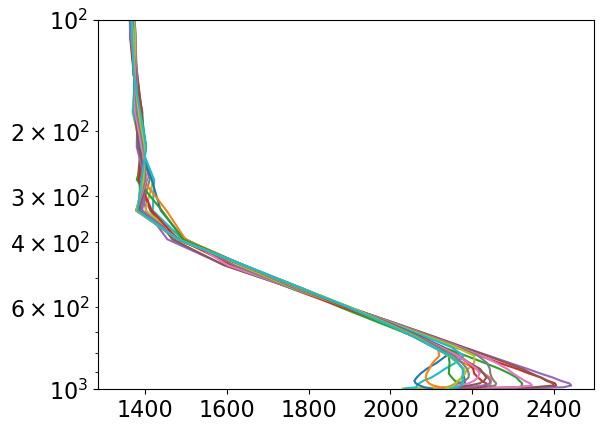

In [5]:

from netCDF4 import Dataset
import numpy as np


import matplotlib
import matplotlib.pylab as pl

%run /Users/markhammond/plotter_functions.py


plt.close("all")
plt.rcParams.update({'font.size': 14})


#fhp = Dataset('/Users/markhammond/Work/Data/clouds-40', mode='r+')#



fh1=Dataset('/Users/markhammond/Work/Data/55cnce-grey-control-2', mode='r+')

fh1=Dataset('/Users/markhammond/Work/Data/thesis-55cnce-grey', mode='r+')

fh1=Dataset('/Users/markhammond/Work/Data/thesis-dyn-control', mode='r+')
fh1=Dataset('/Users/markhammond/Work/Data/thesis-dyn-control_100-300', mode='r+')
fh1=Dataset('/Users/markhammond/Work/Data/thesis-dyn-control_300-1300', mode='r+')

#fh1=Dataset('/Users/markhammond/Work/Data/thesis-dyn-axi_0-300', mode='r+')
#fh1=Dataset('/Users/markhammond/Work/Data/thesis-dyn-axi_300-1300', mode='r+')

fh1=Dataset('/Users/markhammond/Work/Data/thesis-dyn-control-final', mode='r+')
fh1=Dataset('/Users/markhammond/Work/Data/thesis-dyn-control-final_200', mode='r+')

fh1=Dataset('/Users/markhammond/Work/Data/thesis-control-55cnce', mode='r+')
fh1=Dataset('/Users/markhammond/Work/Data/thesis-control-55cnce-soc', mode='r+')
fh1=Dataset('/Users/markhammond/Work/Data/thesis-control-55cnce', mode='r+')


#fh1=Dataset('/Users/markhammond/Work/Data/thesis-dyn-control-axi', mode='r+')


#fhp = Dataset('/Users/markhammond/Work/Data/55cnce-average', mode='r+')#


#fh1.variables['temp'].valid_range = [100.,5000.]
#fh1.variables['ucomp'].valid_range = [-10000.,10000.]
#fh1.variables['vcomp'].valid_range = [-10000.,10000.]

variables = {name: 0 for name in fh1.variables}
for var in fh1.variables:
    variables[var] = fh1.variables[var][:]
    #for fh in [fh2, fh3, fh4, fh5, fh6]:
    #    variables[var] += fh.variables[var][:]
    #variables[var] = variables[var]/6.0







temp = variables["temp"]
u = variables["ucomp"]
v = variables["vcomp"]
#w = variables["w"]#
omega = variables["omega"]
#L0 = variables["L0"]




if 1==1:
    pfull = fh1.variables['level_full'][:]
    phalf = fh1.variables['level_half'][:]

npx=91
npy=191
npz=len(pfull)

if 1==1:
    lons = fh1.variables['longitude'][:]
    lats = fh1.variables['latitude'][:]
    
R=8.31
g=9.81
pfull_3D = np.rollaxis(np.tile(pfull,[np.size(u,0),91,191,1]),axis=3,start=1)


Rcp=0.286
theta = temp[:]*(pfull_3D[:]/np.max(pfull_3D))**(-Rcp)


lon, lat = np.meshgrid(lons, lats)


#plt.clim(0,3000)
#x, y = m(lon,lat)

#temp = temp - temp.mean(axis=3, keepdims=True)
#u = u - u.mean(axis=3, keepdims=True)
#omega = omega - omega.mean(axis=3, keepdims=True)
#v = v - v.mean(axis=3, keepdims=True)
#pv = pv - pv.mean(axis=3, keepdims=True)
#h500 = h500 - h500.mean(axis=2, keepdims=True)


iso_u = np.zeros([96,144])


iso_u=np.roll(iso_u,10,axis=1)

    
l=-10
plot_map(90.0*lats/np.max(lats),lons,np.roll(temp[-1,l],47,axis=1),'Temperature',['Longitude','Latitude'],[-180,180],[-90,90],True,nlev=12)
step_x = 10
step_y = 5
plt.quiver(lons[::step_x],90.0*lats[::step_y]/np.max(lats),np.roll(u,47,axis=3)[-1,l,::step_y,::step_x],np.roll(v,47,axis=3)[-1,l,::step_y,::step_x])   
plt.savefig('default-gcm-temp.pdf')

plot_map(90.0*lats/np.max(lats),lons,np.roll(u[-1,l],47,axis=1),'Temperature',['Longitude','Latitude'],[-180,180],[-90,90],True,nlev=12)
#plot_map(90.0*lats/np.max(lats),lons,np.roll(v[-1,l],47,axis=1),'Temperature',['Longitude','Latitude'],[-180,180],[-90,90],True,nlev=12)

# plot_map(90.0*lats/np.max(lats),lons,np.roll(np.mean(h500,axis=0),47,axis=1),'Temperature',['Longitude','Latitude'],[-180,180],[-90,90],True,nlev=12)
# step_x = 10
# step_y = 5
# plt.quiver(lons[::step_x],90.0*lats[::step_y]/np.max(lats),np.roll(u,47,axis=3)[-1,l,::step_y,::step_x],np.roll(v,47,axis=3)[-1,l,::step_y,::step_x])   
# plt.savefig('default-gcm-test.pdf')
    
plt.figure()
plot_map(1.0*pfull/pfull[-1],90.0*lats/np.max(lats),np.mean(u[-1],axis=2),'Mean Zonal Velocity',['Latitude','Pressure (bar)'],[-90,90],[1,1e-2],True,nlev=12)
plt.gca().set_yscale('log')
plt.savefig('default-gcm-zonal-flow.pdf')


plt.figure()
plot_map(1.0*pfull/pfull[-1],90.0*lats/np.max(lats),np.mean(v[-1],axis=2),'Mean Meridional Velocity',['Latitude','Pressure (bar)'],[-90,90],[1,1e-2],True,nlev=12)
plt.gca().set_yscale('log')

#plt.figure()
#plot_map(1.0*pfull/pfull[-1],90.0*lats/np.max(lats),np.mean(omega[-1],axis=2),'Mean Zonal Omega',['Latitude','Pressure (bar)'],[-90,90],[1,1e-2],True,nlev=12)
#plt.gca().set_yscale('log')

plt.figure()
plt.plot(temp[-1,0:,48,::10],pfull[0:])
plt.gca().invert_yaxis()
plt.gca().set_yscale('log')
plt.ylim([1e3,1e0])
#plt.ylim([1000,10])
#print(temp[-1,1:,48,0])
plt.figure()
plt.plot(temp[-1,0:,48,::10],pfull[0:])
plt.gca().invert_yaxis()
plt.gca().set_yscale('log')
plt.ylim([1e3,1e2])
#plt.ylim([1000,10])
#print(temp[-1,1:,48,0])



fh1.close()





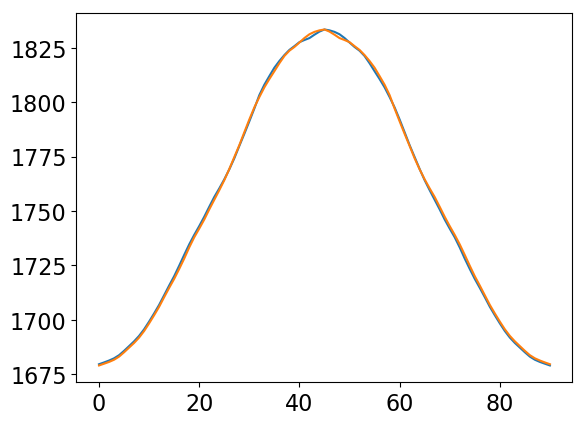

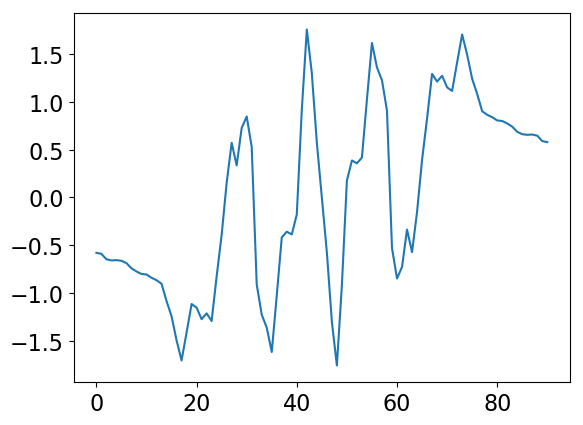

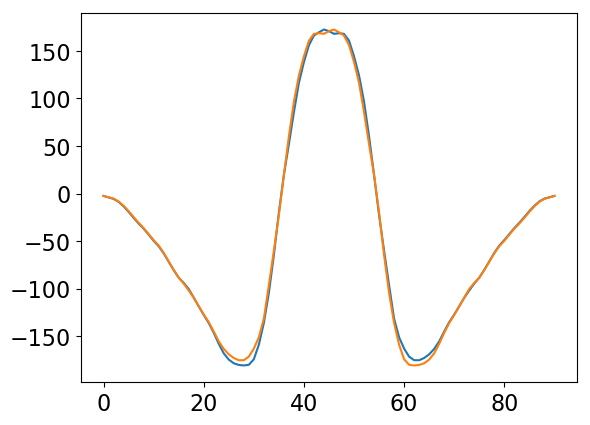

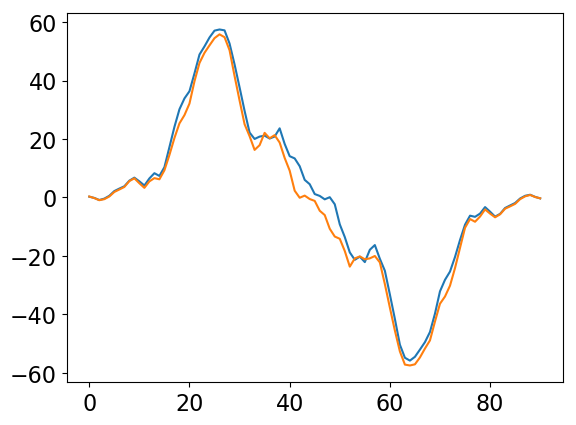

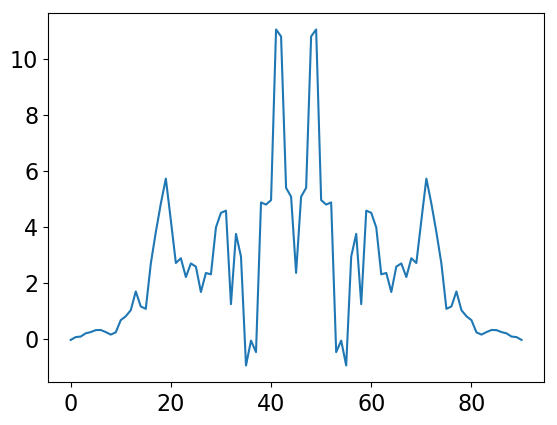

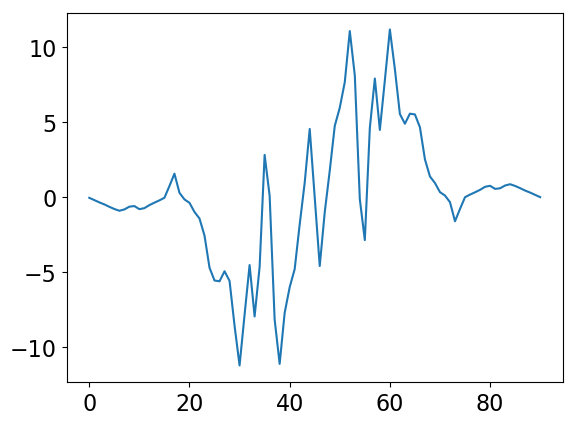

In [73]:
l=-10
plt.plot(np.mean(temp[-1,l],axis=1))
plt.plot(np.mean(temp[-1,l,::-1,:],axis=1))
plt.figure()
plt.plot(np.mean(temp[-1,l,::-1,:],axis=1)-np.mean(temp[-1,l],axis=1))
plt.figure()
plt.plot(np.mean(u[-1,l],axis=1))
plt.plot(np.mean(u[-1,l,::-1,:],axis=1))
plt.figure()
plt.plot(np.mean(v[-1,l],axis=1))
plt.plot(np.mean(-v[-1,l,::-1,:],axis=1))
plt.figure()
plt.plot((np.mean(v[-1,l],axis=1)+np.mean(v[-1,l,::-1,:],axis=1)))
plt.figure()
plt.plot((np.mean(u[-1,l],axis=1)-np.mean(u[-1,l,::-1,:],axis=1)))

<Figure size 640x480 with 0 Axes>

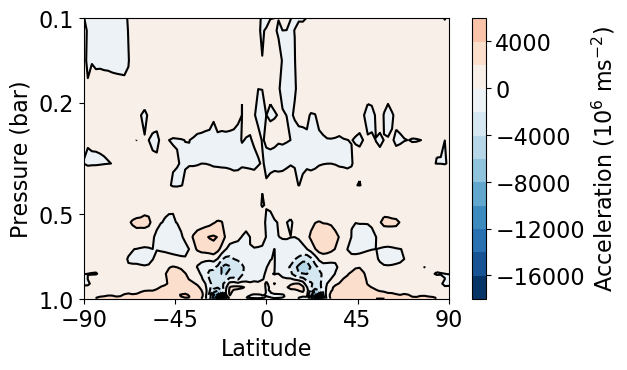

<Figure size 640x480 with 0 Axes>

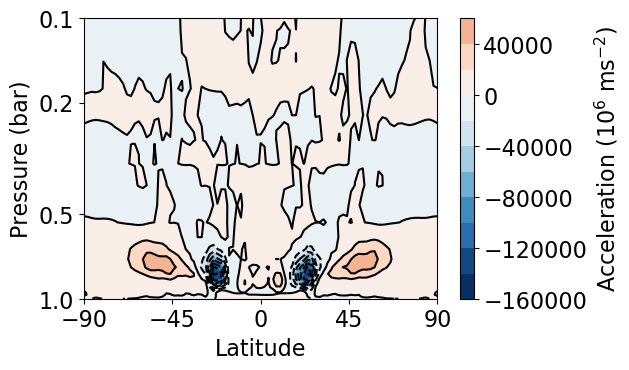

<Figure size 640x480 with 0 Axes>

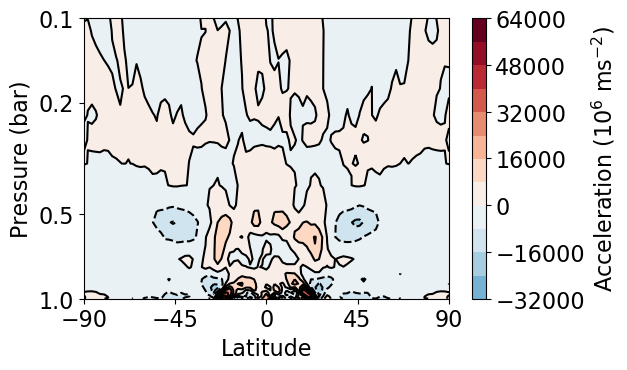

<Figure size 640x480 with 0 Axes>

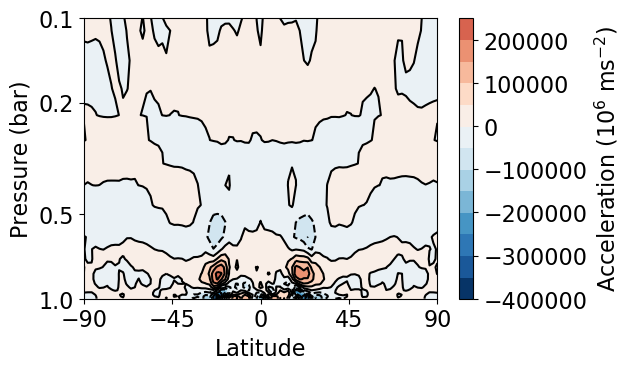

<Figure size 640x480 with 0 Axes>

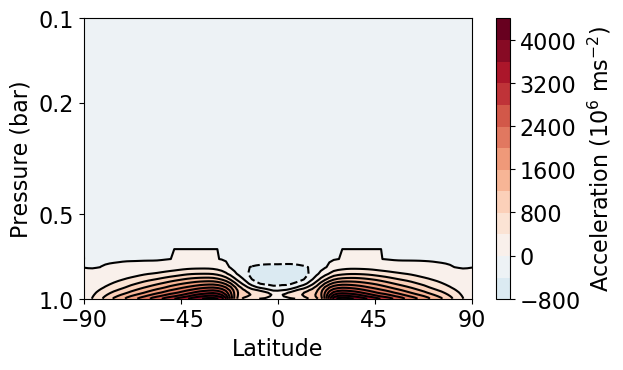

<Figure size 640x480 with 0 Axes>

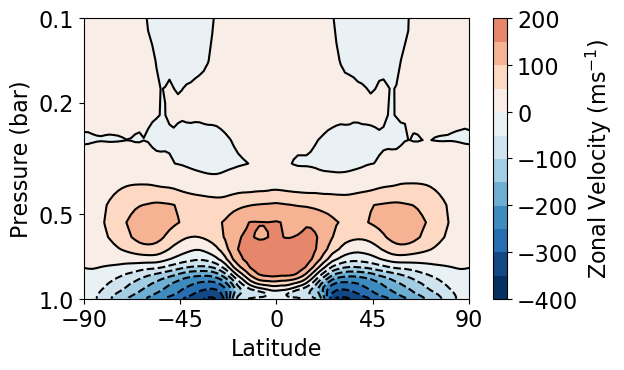

In [74]:


from matplotlib.ticker import FormatStrFormatter



start=0
end=191

t=-1

lat_3D = np.tile(lat,[npz,1,1])
lon_3D = np.tile(lon,[npz,1,1])
cos_lat_3D=np.cos(np.pi*lat_3D/180.)
cos_lat_2D=np.mean(np.cos(np.pi*lat_3D/180.),axis=2)
sin_lat_3D=np.sin(np.pi*lat_3D/180.)
rad_lat_3D = np.pi*lat_3D/180.
dlat_3D = np.pi*1.8947368*np.ones([npz,npx,npy])/180.
dlon_3D = np.pi*2.5*np.ones([npz,npx,npy])/180.
dp_3D = np.rollaxis(np.tile(np.diff(100.*phalf),[npx,npy,1]),2)
dp_2D = np.mean(np.rollaxis(np.tile(np.diff(100.*phalf),[npx,npy,1]),2),axis=2)
dm_3D = R*R*cos_lat_3D*dlat_3D*dlon_3D*dp_3D/g
pfull_3D=np.rollaxis(np.tile(pfull,[npx,npy,1]),2)
phalf_3D=np.rollaxis(np.tile(phalf,[npx,npy,1]),2)

rho0=1000.0
M = 0.028
rho0_3D = pfull_3D*M/(R*temp[-1])
#/3.16227766
Omega = 7.29e-5 /10# 3.16227766
H=R*np.mean(temp)/(0.029*g)

f = 2 * Omega * sin_lat_3D
a=6.371e6

accn_terms = []
labels = []



# Coriolis etc. acceleration
coriolis_accn = np.mean(f*v[t],axis=2)
mean_horiz_accn = - (np.mean(v[t],axis=2) / (a * cos_lat_2D)) *np.gradient(np.mean(u[t],axis=2)*cos_lat_2D,rad_lat_3D[0,:,0],axis=1)
accn_terms.append(coriolis_accn+mean_horiz_accn)
labels.append(r'Acceleration ($10^{6}$ ms$^{-2}$)')

# Mean vertical
mean_vert_accn = - (np.mean(omega[t],axis=2)) *np.gradient(np.mean(u[t],axis=2),pfull,axis=0)/100.0
accn_terms.append(mean_vert_accn)
labels.append(r'Acceleration ($10^{6}$ ms$^{-2}$)')

# Stationary horizontal
uStar = u - u.mean(axis=3, keepdims=True)
vStar = v - v.mean(axis=3, keepdims=True)
stat_horiz_accn = - (1 / (a*cos_lat_2D*cos_lat_2D) ) * np.gradient(np.mean(uStar[t]*vStar[t],axis=2)*cos_lat_2D*cos_lat_2D,rad_lat_3D[0,:,0],axis=1)
accn_terms.append(stat_horiz_accn)
labels.append(r'Acceleration ($10^{6}$ ms$^{-2}$)')


# Stationary vertical
omegaStar = omega - omega.mean(axis=3, keepdims=True)
stat_vert_accn = - np.gradient(np.mean(uStar[t]*omegaStar[t],axis=2),pfull,axis=0)/100.0
accn_terms.append(stat_vert_accn)
labels.append(r'Acceleration ($10^{6}$ ms$^{-2}$)')

# Damping
vcoeff = -1./(1. - 0.7) / 86400.
sigma = pfull_3D/np.max(pfull_3D)
damping_accn = np.mean(np.where(sigma > 0.7, u[t]*vcoeff*(sigma-0.7),0 ),axis=2)


        
accn_terms.append(damping_accn)
labels.append(r'Acceleration ($10^{6}$ ms$^{-2}$)')

accn_terms.append(np.mean(u[t],axis=2)/1e6)
labels.append(r'Zonal Velocity (ms$^{-1}$)')

#accn_terms.append(coriolis_accn+mean_horiz_accn+mean_vert_accn+stat_horiz_accn+stat_vert_accn+damping_accn)#
#labels.append('Sum')



for i in range(len(accn_terms)):
    plt.figure()
    plot_map(1.0*pfull/pfull[-1],90.0*lats/np.max(lats),1e6*accn_terms[i],labels[i],['Latitude','Pressure (bar)'],[-90,90],[1,1e-1],True,nlev=12,centre_zero=True,log_y=True)
    plt.gca().set_yscale('log')
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    plt.gca().yaxis.set_minor_formatter(FormatStrFormatter('%.1f'))
    plt.minorticks_off()
    plt.yticks([1.0,0.5,0.2,0.1])
    plt.savefig(str(i)+'_flux.pdf')
    


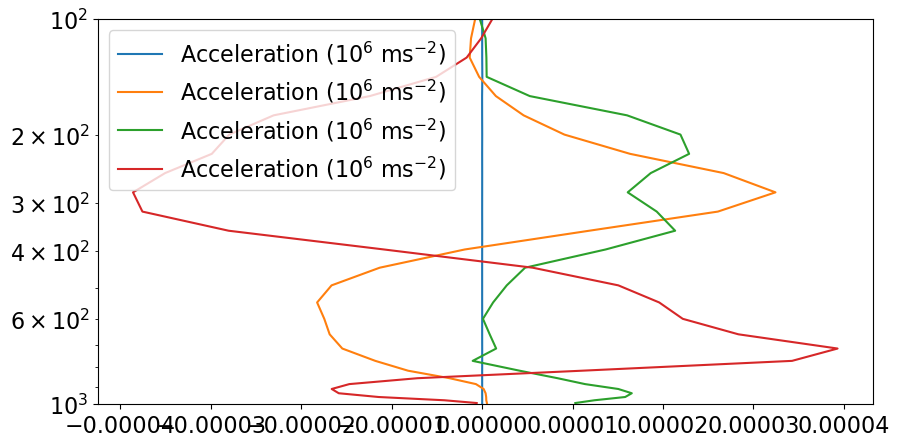

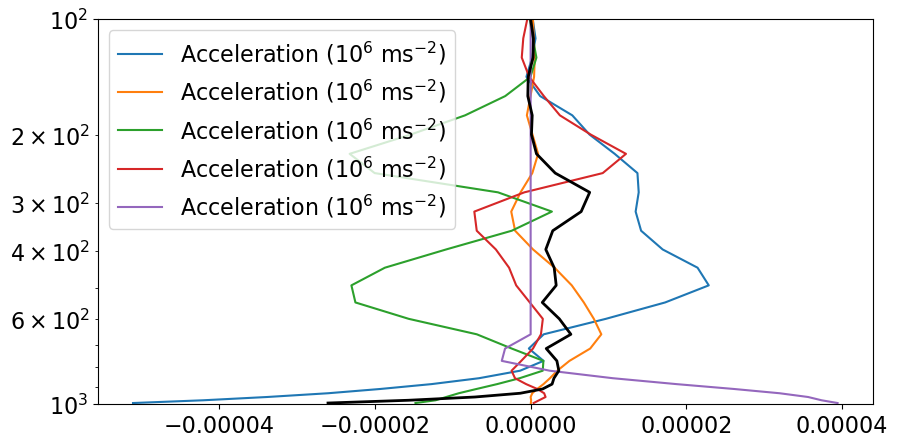

In [88]:
eq=45
plt.figure(figsize=(10,5))
for i in range(4):
    plt.semilogy(accn_terms[i][:,45],pfull,label=labels[i])
    
plt.ylim([1e3,1e2])
plt.legend()

plt.figure(figsize=(10,5))
for i in range(5):
    plt.semilogy(accn_terms[i][:,22],pfull,label=labels[i])
    
plt.ylim([1e3,1e2])
plt.legend()

accn_terms_sum = accn_terms[0]+accn_terms[1]+accn_terms[2]+accn_terms[3]+accn_terms[4]


plt.semilogy(accn_terms_sum[:,22],pfull,lw=2,color='k')
    


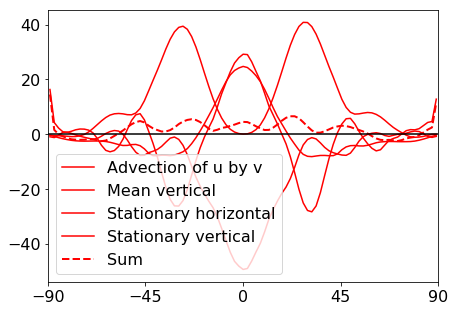

In [35]:
l=-18
plt.figure(figsize=(7,5))

colors=['r','r','r','r']
for i in range(4):
    plt.plot(lats,1e6*accn_terms[i][l],label=labels[i],color=colors[i])
    
plt.plot(lats,1e6*accn_terms_sum[l],'r--',lw=2,label='Sum')
plt.axhline(0,color='k')

plt.xticks([-90,-45,0,45,90])
plt.xlim([-90,90])
plt.legend()

<Figure size 700x500 with 0 Axes>

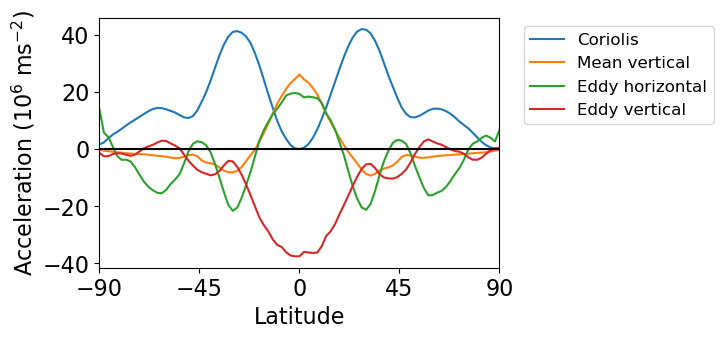

<Figure size 700x500 with 0 Axes>

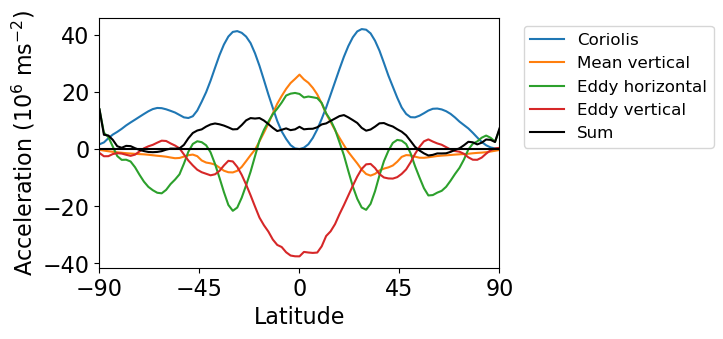

In [89]:

l=-18
plt.figure(figsize=(7,5))
plot_profiles([1e6*accn_terms[0][l],1e6*accn_terms[1][l],1e6*accn_terms[2][l],1e6*accn_terms[3][l]] \
              ,90.0*lats/np.max(lats),['Latitude',r'Acceleration ($10^{6}$ ms$^{-2}$)'],[-90,90],['Coriolis','Mean vertical','Eddy horizontal','Eddy vertical'],True, \
              ['C0','C1','C2','C3'])
plt.axhline(0,color='k')
plt.savefig('h_profiles.pdf')


l=-18
plt.figure(figsize=(7,5))
plot_profiles([1e6*accn_terms[0][l],1e6*accn_terms[1][l],1e6*accn_terms[2][l],1e6*accn_terms[3][l],1e6*accn_terms_sum[l]] \
              ,90.0*lats/np.max(lats),['Latitude',r'Acceleration ($10^{6}$ ms$^{-2}$)'],[-90,90],['Coriolis','Mean vertical','Eddy horizontal','Eddy vertical','Sum'],True, \
              ['C0','C1','C2','C3','k'])
plt.axhline(0,color='k')
plt.savefig('h_profiles_sum.pdf')

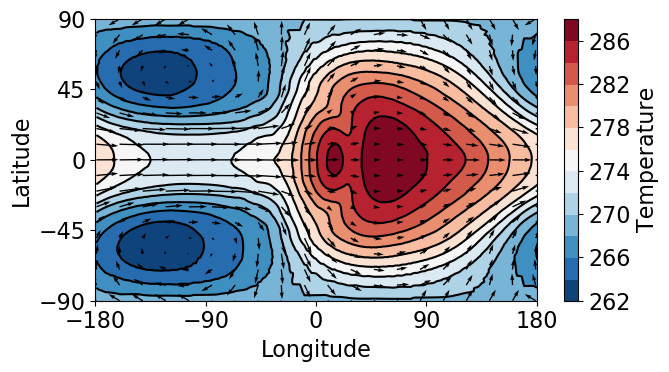

In [106]:
l=-12
plot_map(90.0*lats/np.max(lats),lons,np.roll(temp[-1,l],47,axis=1),'Temperature',['Longitude','Latitude'],[-180,180],[-90,90],True,nlev=12)
step_x = 10
step_y = 5
plt.quiver(lons[::step_x],90.0*lats[::step_y]/np.max(lats),np.roll(u,47,axis=3)[-1,l,::step_y,::step_x],np.roll(v,47,axis=3)[-1,l,::step_y,::step_x])   
plt.savefig('default-gcm-temp.pdf')

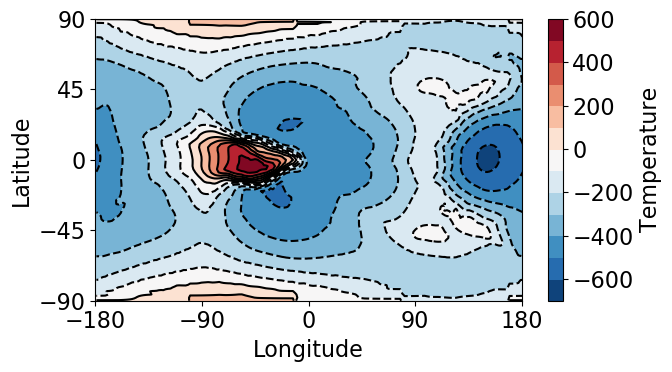

In [81]:
l=-1
plot_map(90.0*lats/np.max(lats),lons,np.roll(u[-1,l],47,axis=1),'Temperature',['Longitude','Latitude'],[-180,180],[-90,90],True,nlev=12)


In [54]:
np.max(u)

204.59625